In [1]:
import cv2
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("/opt/ml/level3_cv_finalproject-cv-01/model/output_true.csv")

In [3]:
num_classes = 110

image_path = df['image_path']
true_labels = df['gt']
predicted_labels = df['pred']

In [4]:
image_path, true_labels, predicted_labels = [], [], []
for path, gt, pred in zip(df['image_path'], df['gt'], df['pred']):
    image_path.append(path)
    true_labels.append(gt.replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').strip().split(' '))
    predicted_labels.append(pred.replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').strip().split(' '))

In [5]:
with open("/opt/ml/level3_cv_finalproject-cv-01/model/data/classes.json") as file:
    classes_dict = json.load(file)
with open("/opt/ml/level3_cv_finalproject-cv-01/model/data/ingredients.json") as file:
    ingredients_dict = json.load(file)

classes = []
for label in classes_dict.values():
    classes.append(label)
for ingredient in ingredients_dict.values():
    classes.append(ingredient)

In [6]:
classes

['bbq',
 'baek_sook',
 'baguette',
 'banh_mi',
 'beef_tartare',
 'bibimbap',
 'bingsu',
 'bulgogi',
 'bunza',
 'burger',
 'burrito',
 'cake',
 'cannoli',
 'caprese',
 'chicken',
 'chili_crab',
 'chocolate',
 'churros',
 'coffee_hot',
 'coffee_ice',
 'cookie',
 'crepe',
 'croissant',
 'croque_monsieur',
 'curry',
 'dacquoise',
 'dim_sum',
 'donut',
 'egg_benedict',
 'egg_tart',
 'escargot',
 'fish_and_chips',
 'fondue',
 'french_fries',
 'french_toast',
 'galbi',
 'gelato',
 'gimbap',
 'gratin',
 'hot_dog',
 'hot_pot',
 'jajangmyeon',
 'japchae',
 'kaya_toast',
 'kebap',
 'kimchi_stew',
 'korean_pancake',
 'lasana',
 'lobster',
 'macaroon',
 'madeleine',
 'mapa_tofu',
 'milfeuille',
 'muffin',
 'naan',
 'nachos',
 'nasi_goreng',
 'omelet',
 'onigiri',
 'pad_thai',
 'paea',
 'pan_cake',
 'pasta',
 'pie',
 'pizza',
 'popcorn',
 'pork_chop',
 'pound_cake',
 'pudding',
 'quesadilla',
 'ramen',
 'ratatouille',
 'rice_noodle',
 'risotto',
 'salad',
 'sandwich',
 'sashimi',
 'schweinshaxe',
 '

In [7]:
class_correct = [0] * num_classes
class_total = [0] * num_classes

incorrect_image_path, incorrect_class, incorrect_gt = [], [], []

for path, predicted_label, true_label in zip(image_path, predicted_labels, true_labels):
    flag = False
    for i, (pred, true) in enumerate(zip(predicted_label, true_label)):
        if pred == true:
            class_correct[i] += 1
        else:
            flag = True
        class_total[i] += 1
    if flag:
        incorrect_image_path.append(path)
        incorrect_class.append(predicted_label)
        incorrect_gt.append(true_label)


In [8]:
label_accuracies = {}
for label, c, t in zip(classes, class_correct, class_total):
    label_accuracies[label] = c/t

In [9]:
i = 0

In [10]:
print(f"{len(image_path)}개의 이미지 중 {len(incorrect_gt)}개 맞추지 못함({(len(incorrect_gt)/len(image_path))*100}%)")

18180개의 이미지 중 114개 맞추지 못함(0.6270627062706271%)


Ground Truth : ['ratatouille', 'tomato']
Predict class : ['ratatouille', 'egg', 'tomato', 'wheat_products', 'soy']


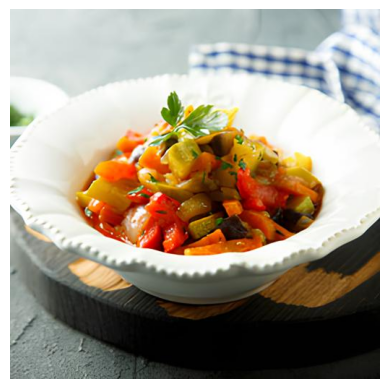

In [69]:
gt = [classes[idx] for idx, v in enumerate(incorrect_gt[i]) if v == 'True']
incorrect = [classes[idx] for idx, v in enumerate(incorrect_class[i]) if v == 'True']
print(f"Ground Truth : {gt}")
print(f"Predict class : {incorrect}")

fig, ax = plt.subplots()
image = cv2.imread(incorrect_image_path[i])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
i += 1